<a href="https://colab.research.google.com/github/SophiaKim100/NDSRP/blob/main/Olympic_Events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Do Physical Traits Predict Olympic Medal Success?**
Can height, weight, and age be used to predict whether an Olympic athlete will win a medal?

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import metrics
from sklearn.preprocessing import *
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D

# **Below: Visualization/Analysis of Recent (last 45 years) Dataset**
General --> includes all seasons, all genders, all ages, all sports

### **Visualizations**

In [219]:
data = pd.read_csv('/content/athlete_events.csv')
all_df = pd.DataFrame(data)
all_df['Medalist'] = all_df['Medal'].notna().astype(int)
all_df['Season_Encoded'] = all_df['Season'].map({'Summer': 1, 'Winter': 0})
all_df.drop(['Name', 'Team', 'NOC', 'Games', 'City', 'Event', 'Medal', 'Season'], axis = 1, inplace = True)
all_df = all_df[all_df['Year'] >= 1980]
all_df.drop_duplicates(inplace = True)
all_df.dropna(subset=['ID','Age', 'Height', 'Weight', 'Sport', 'Year', 'Season_Encoded'], inplace=True)
all_df.head()

,ID,Sex,Age,Height,Weight,Year,Sport,Medalist,Season_Encoded
0,1,M,24.0,180.0,80.0,1992,Basketball,0,1
1,2,M,23.0,170.0,60.0,2012,Judo,0,1
4,5,F,21.0,185.0,82.0,1988,Speed Skating,0,0
6,5,F,25.0,185.0,82.0,1992,Speed Skating,0,0
8,5,F,27.0,185.0,82.0,1994,Speed Skating,0,0


In [130]:
all_grouped_height = all_df.groupby('Sport')[['Height']].describe()
all_grouped_height

Height                                       \
                             count        mean        std    min    25%   
Sport                                                                     
Alpine Skiing               2470.0  174.334818   7.870306  152.0  168.0   
Archery                     1270.0  173.291339   8.425926  152.0  168.0   
Athletics                  18070.0  176.242391  10.011097  142.0  169.0   
Badminton                   1170.0  174.283761   8.476899  150.0  168.0   
Baseball                     846.0  182.599291   6.785222  147.0  178.0   
Basketball                  2535.0  191.815385  12.155556  161.0  183.0   
Beach Volleyball             538.0  186.202602   9.377944  163.0  180.0   
Biathlon                    1756.0  174.116173   8.536107  150.0  168.0   
Bobsleigh                   1373.0  182.328478   6.543243  155.0  179.0   
Boxing                      2839.0  173.688271   9.668740  127.0  167.0   
Canoeing                    3269.0  178.942184   8.447151  153.0  173.0   
Cross Country Skiing        2428.0  174.168863   8.234480  154.0  168.0   
Curling                      410.0  174.168293   8.614451  153.0  168.0   
Cycling                     4396.0  176.352366   8.105605  138.0  171.0   
Diving                      1159.0  166.441760   7.886053  137.0  160.0   
Equestrianism               2049.0  174.790630   8.085637  150.0  169.0   
Fencing                     2664.0  178.101727   8.630902  152.0  172.0   
Figure Skating              1143.0  168.457568  10.092813  142.0  160.0   
Football                    3197.0  175.725055   8.477817  140.0  170.0   
Freestyle Skiing             909.0  170.938394   8.491415  149.0  165.0   
Golf                         108.0  174.046296   8.544971  157.0  168.0   
Gymnastics                  2134.0  160.418932   8.998658  132.0  155.0   
Handball                    2838.0  183.624383   9.885449  157.0  176.0   
Hockey                      3047.0  172.712176   8.818752  138.0  166.0   
Ice Hockey                  3465.0  179.509668   8.274832  150.0  175.0   
Judo                        2985.0  173.762479  10.626372  143.0  166.0   
Luge                         916.0  177.197598   7.621313  153.0  172.0   
Modern Pentathlon            586.0  177.778157   7.542604  155.0  173.0   
Nordic Combined              534.0  177.114232   5.792217  162.0  173.0   
Rhythmic Gymnastics          615.0  167.795122   5.393956  142.0  164.0   
Rowing                      5293.0  184.940110   9.939367  142.0  179.0   
Rugby Sevens                 297.0  175.363636  10.185232  153.0  168.0   
Sailing                     3411.0  178.196423   8.509929  150.0  172.0   
Shooting                    3831.0  173.333072   8.569559  146.0  168.0   
Short Track Speed Skating    812.0  170.181034   7.826918  150.0  164.0   
Skeleton                     173.0  176.098266   8.764135  157.0  170.0   
Ski Jumping                  754.0  177.201592   6.375309  152.0  173.0   
Snowboarding                 851.0  173.036428   8.629080  150.0  166.0   
Softball                     441.0  169.428571   6.633592  150.0  165.0   
Speed Skating               1682.0  175.134958   8.683556  152.0  168.0   
Swimming                    7806.0  179.905329   9.766309  138.0  173.0   
Synchronized Swimming        706.0  168.334278   5.103067  153.0  165.0   
Table Tennis                1268.0  171.383281   9.175038  145.0  165.0   
Taekwondo                    596.0  176.750000  10.038895  150.0  170.0   
Tennis                      1453.0  179.088782   9.108829  150.0  172.0   
Trampolining                 149.0  166.563758   7.055113  154.0  162.0   
Triathlon                    526.0  173.640684   8.821736  153.0  167.0   
Volleyball                  2449.0  188.890159  10.225710  153.0  182.0   
Water Polo                  1924.0  185.887214   8.953585  160.0  180.0   
Weightlifting               2051.0  167.719161  10.255331  140.0  160.0   
Wrestling                   3269.0  172.806057  10.25

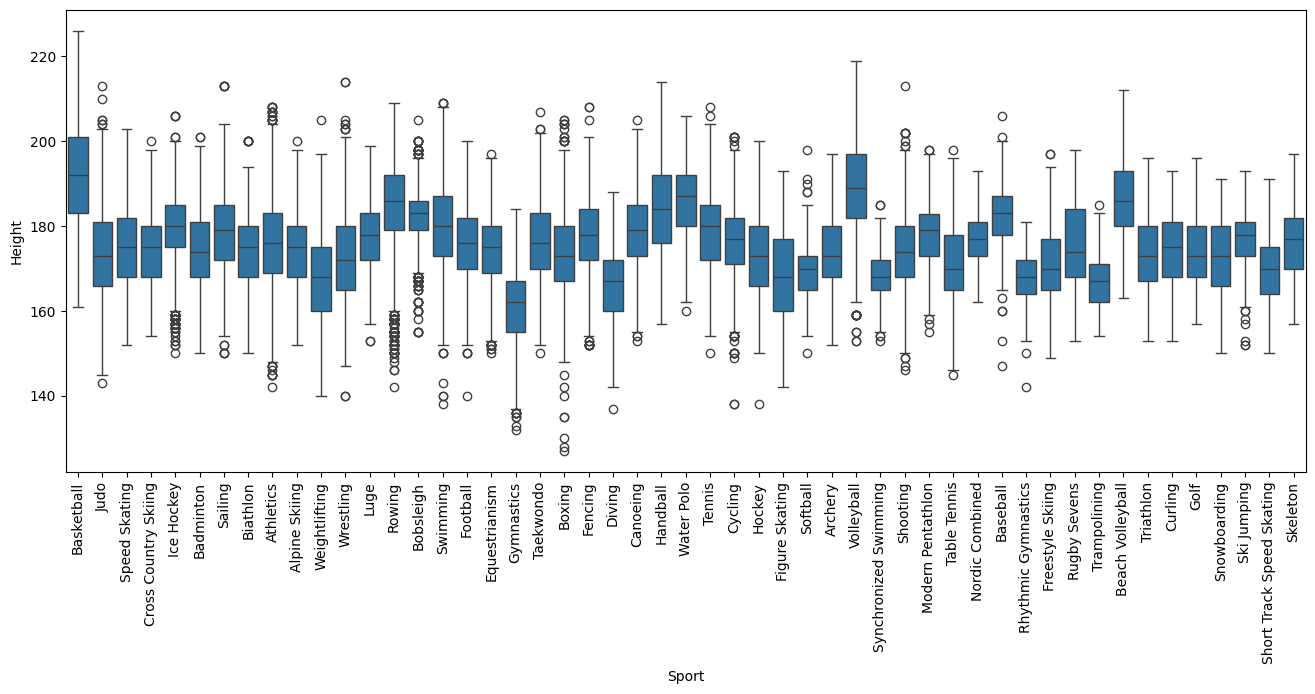

In [133]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Sport', y='Height', data=all_df)
plt.xticks(rotation=90)
plt.show()

In [131]:
all_grouped_weight = all_df.groupby('Sport')[['Weight']].describe()
all_grouped_weight

Weight                                          \
                             count       mean        std   min   25%   50%   
Sport                                                                        
Alpine Skiing               2470.0  73.614575  11.609108  45.0  64.0  73.0   
Archery                     1270.0  70.085433  13.172149  42.0  60.0  69.0   
Athletics                  18070.0  69.100277  17.064470  35.0  58.0  65.0   
Badminton                   1170.0  68.193162   9.290200  43.0  61.0  68.0   
Baseball                     846.0  85.718085   9.670122  38.0  79.0  85.0   
Basketball                  2535.0  86.494280  16.189750  50.0  74.0  85.0   
Beach Volleyball             538.0  79.089219  12.246667  55.0  68.0  78.0   
Biathlon                    1756.0  66.558087   9.563004  45.0  58.0  67.0   
Bobsleigh                   1373.0  90.628186  10.386813  55.0  85.0  91.0   
Boxing                      2839.0  65.905953  13.852272  47.0  54.0  64.0   
Canoeing                    3269.0  76.839400  10.335804  50.0  69.0  78.0   
Cross Country Skiing        2428.0  66.362850   9.374666  45.0  58.0  67.0   
Curling                      410.0  72.131707  12.273063  45.0  62.0  72.0   
Cycling                     4396.0  69.477934   9.862742  45.0  63.0  70.0   
Diving                      1159.0  60.152718   9.522515  28.0  52.5  60.0   
Equestrianism               2049.0  67.832601   9.201429  43.0  60.0  68.0   
Fencing                     2664.0  71.428491  10.602665  44.0  63.0  72.0   
Figure Skating              1143.0  59.699038  12.037175  32.0  49.0  57.0   
Football                    3197.0  70.297154   9.030372  45.0  64.0  71.0   
Freestyle Skiing             909.0  67.036854  11.115261  43.0  59.0  65.0   
Golf                         108.0  71.194444  11.643022  48.0  63.0  70.0   
Gymnastics                  2134.0  53.905811  10.711493  25.0  45.0  55.0   
Handball                    2838.0  81.652572  13.792529  50.0  70.0  82.0   
Hockey                      3047.0  68.554644  10.111049  45.0  60.0  68.0   
Ice Hockey                  3465.0  81.944012  11.389165  47.0  75.0  84.0   
Judo                        2985.0  78.196482  21.839294  46.0  63.0  73.0   
Luge                         916.0  78.001092  10.546229  48.0  70.0  78.0   
Modern Pentathlon            586.0  68.921502   8.575047  42.0  62.0  70.0   
Nordic Combined              534.0  66.708801   5.683320  53.0  63.0  67.0   
Rhythmic Gymnastics          615.0  48.760976   5.177291  30.0  45.0  49.0   
Rowing                      5293.0  80.532307  13.346514  39.0  72.0  82.0   
Rugby Sevens                 297.0  79.006734  14.661033  53.0  66.0  77.0   
Sailing                     3411.0  75.174582  13.494550  48.0  66.0  73.0   
Shooting                    3831.0  73.942182  14.295286  40.0  63.0  74.0   
Short Track Speed Skating    812.0  64.469212   9.153994  43.0  58.0  63.0   
Skeleton                     173.0  74.086705  12.380991  51.0  62.0  76.0   
Ski Jumping                  754.0  63.604111   6.223598  43.0  60.0  64.0   
Snowboarding                 851.0  69.460635  11.562588  43.0  60.0  68.0   
Softball                     441.0  67.471655   9.412020  45.0  61.0  66.0   
Speed Skating               1682.0  71.258621  10.097517  47.0  63.0  72.0   
Swimming                    7806.0  71.646810  11.428474  39.0  63.0  72.0   
Synchronized Swimming        706.0  55.735127   4.913936  39.0  53.0  55.0   
Table Tennis                1268.0  65.082808  10.068287  42.0  58.0  64.0   
Taekwondo                    596.0  68.088087  13.524589  46.0  57.0  67.0   
Tennis                      1453.0  71.119064  10.690757  48.0  62.0  72.0   
Trampolining                 149.0  59.322148   8.197122  43.0  53.0  58.0   
Triathlon                    526.0  61.817490   8.684357  44.0  55.0  61.0   
Volleyball                  2449.0  80.008983  11.904299  30.0  70.0  80.0   
Water Polo                  1924.0  85.390852  13.

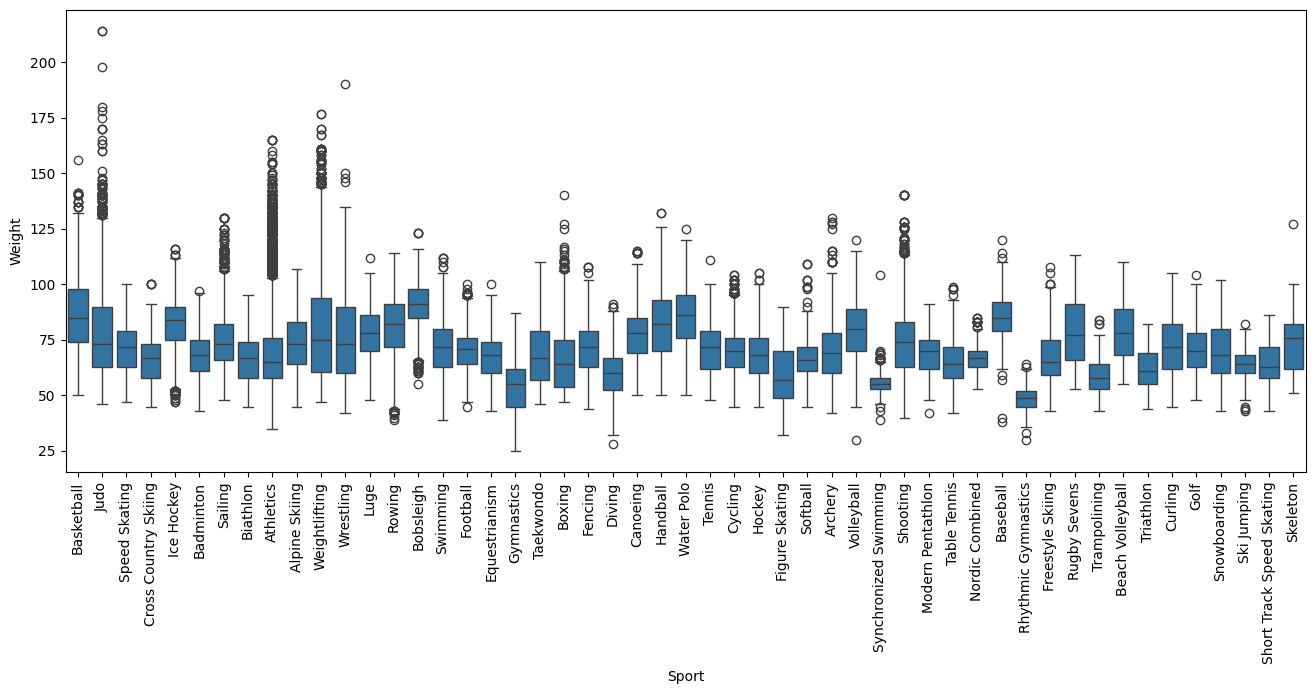

In [134]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Sport', y='Weight', data=all_df)
plt.xticks(rotation=90)
plt.show()

In [132]:
all_grouped_age = all_df.groupby('Sport')[['Age']].describe()
all_grouped_age

Age                                         \
                             count       mean       std   min   25%   50%   
Sport                                                                       
Alpine Skiing               2470.0  23.980567  4.118293  14.0  21.0  24.0   
Archery                     1270.0  26.263780  6.720388  14.0  21.0  25.0   
Athletics                  18070.0  25.933702  4.493768  14.0  23.0  25.0   
Badminton                   1170.0  25.828205  3.853883  16.0  23.0  26.0   
Baseball                     846.0  26.309693  4.550422  18.0  23.0  26.0   
Basketball                  2535.0  26.069822  3.998058  16.0  23.0  26.0   
Beach Volleyball             538.0  29.135688  4.198318  18.0  26.0  29.0   
Biathlon                    1756.0  26.373007  4.291294  17.0  23.0  26.0   
Bobsleigh                   1373.0  28.454479  4.586106  18.0  25.0  28.0   
Boxing                      2839.0  23.487848  3.407456  15.0  21.0  23.0   
Canoeing                    3269.0  25.583359  4.410491  16.0  22.0  25.0   
Cross Country Skiing        2428.0  26.271005  4.546499  15.0  23.0  26.0   
Curling                      410.0  31.136585  6.801472  17.0  26.0  30.0   
Cycling                     4396.0  25.833258  4.645102  16.0  22.0  25.0   
Diving                      1159.0  22.408110  4.108835  13.0  19.0  22.0   
Equestrianism               2049.0  35.185456  8.608156  16.0  29.0  34.0   
Fencing                     2664.0  26.393393  4.637183  14.0  23.0  26.0   
Figure Skating              1143.0  22.860017  4.077790  13.0  20.0  23.0   
Football                    3197.0  23.444166  3.474621  15.0  21.0  23.0   
Freestyle Skiing             909.0  24.430143  4.624777  13.0  21.0  24.0   
Golf                         108.0  29.583333  7.186598  18.0  24.0  28.5   
Gymnastics                  2134.0  20.764761  4.187468  13.0  17.0  20.0   
Handball                    2838.0  26.720578  4.206153  17.0  24.0  26.5   
Hockey                      3047.0  25.697407  3.802797  15.0  23.0  25.0   
Ice Hockey                  3465.0  26.225685  4.554377  15.0  23.0  26.0   
Judo                        2985.0  25.471022  3.867950  14.0  23.0  25.0   
Luge                         916.0  24.870087  5.060675  16.0  21.0  24.0   
Modern Pentathlon            586.0  26.035836  4.281594  15.0  23.0  26.0   
Nordic Combined              534.0  23.998127  3.916818  15.0  21.0  24.0   
Rhythmic Gymnastics          615.0  18.808130  2.506460  13.0  17.0  18.0   
Rowing                      5293.0  25.950501  4.388043  12.0  23.0  26.0   
Rugby Sevens                 297.0  26.080808  3.754304  18.0  23.0  26.0   
Sailing                     3411.0  28.369100  6.165468  15.0  24.0  27.0   
Shooting                    3831.0  31.364918  8.053604  15.0  25.0  30.0   
Short Track Speed Skating    812.0  22.759852  3.868073  13.0  20.0  23.0   
Skeleton                     173.0  28.965318  5.349305  18.0  25.0  29.0   
Ski Jumping                  754.0  23.092838  4.057603  14.0  20.0  23.0   
Snowboarding                 851.0  24.743831  4.547806  14.0  21.5  24.0   
Softball                     441.0  26.229025  4.247424  17.0  23.0  26.0   
Speed Skating               1682.0  24.523187  4.098257  14.0  22.0  24.0   
Swimming                    7806.0  21.353062  3.787788  12.0  19.0  21.0   
Synchronized Swimming        706.0  22.576487  3.399284  15.0  20.0  22.0   
Table Tennis                1268.0  26.613565  5.816494  15.0  22.0  26.0   
Taekwondo                    596.0  24.083893  4.068284  16.0  21.0  24.0   
Tennis                      1453.0  25.218169  4.467501  14.0  22.0  25.0   
Trampolining                 149.0  25.167785  4.508854  18.0  22.0  24.0   
Triathlon                    526.0  27.893536  4.207938  18.0  25.0  28.0   
Volleyball                  2449.0  25.563087  4.092701  15.0  23.0  25.0   
Water Polo                  1924.0  26.161123  4.247421  16.0  23.0  26.0   
Weightlifting              

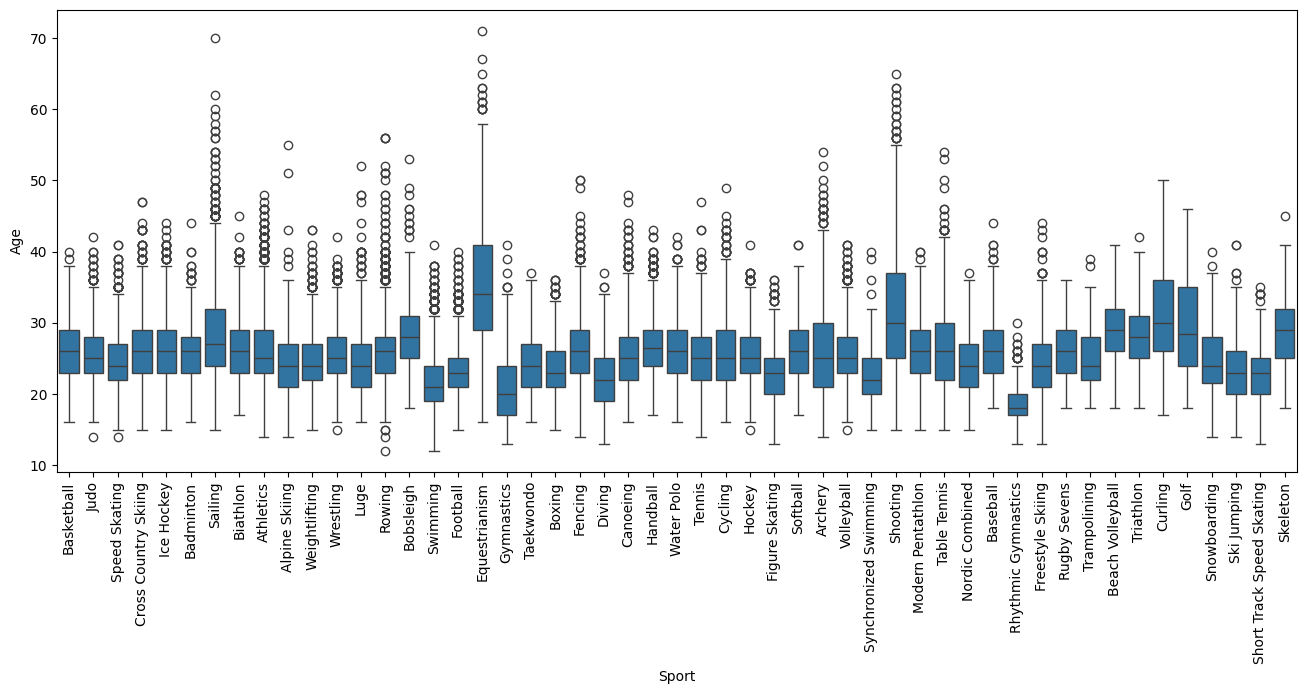

In [135]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Sport', y='Age', data=all_df)
plt.xticks(rotation=90)
plt.show()

In [226]:
medalists_df = all_df[all_df['Medalist'] == 1]
non_medalists_df = all_df[all_df['Medalist'] == 0]

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

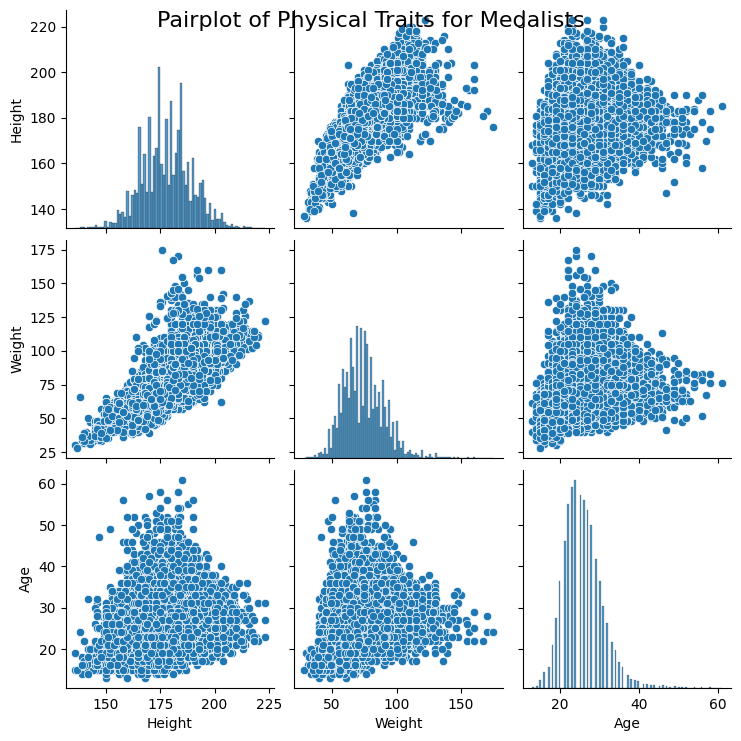

In [228]:
sns.pairplot(medalists_df[['Height', 'Weight', 'Age']], palette='Greens', diag_kind='hist')
plt.suptitle("Pairplot of Physical Traits for Medalists", fontsize=16)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

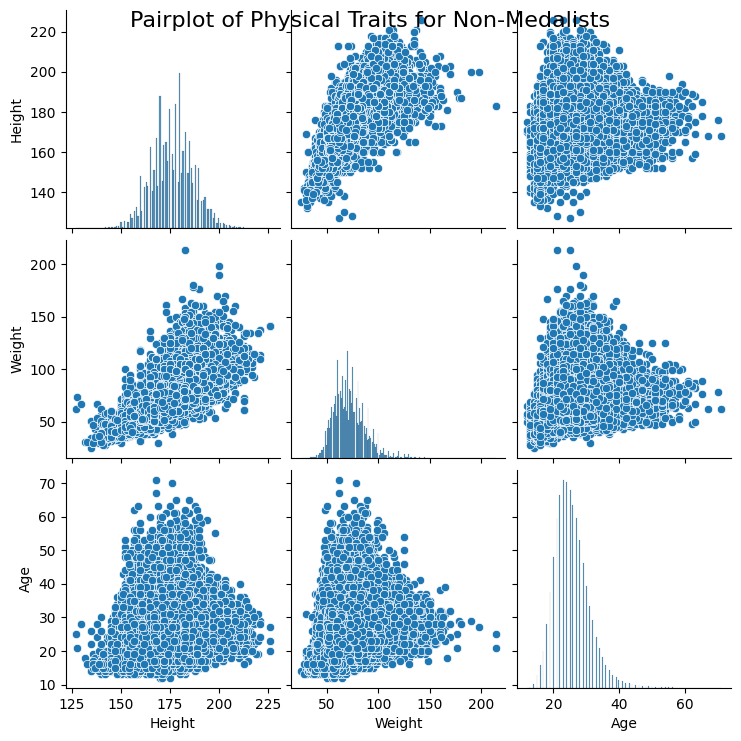

In [230]:
sns.pairplot(non_medalists_df[['Height', 'Weight', 'Age']], palette='Blues', diag_kind='hist')
plt.suptitle("Pairplot of Physical Traits for Non-Medalists", fontsize=16)
plt.show()

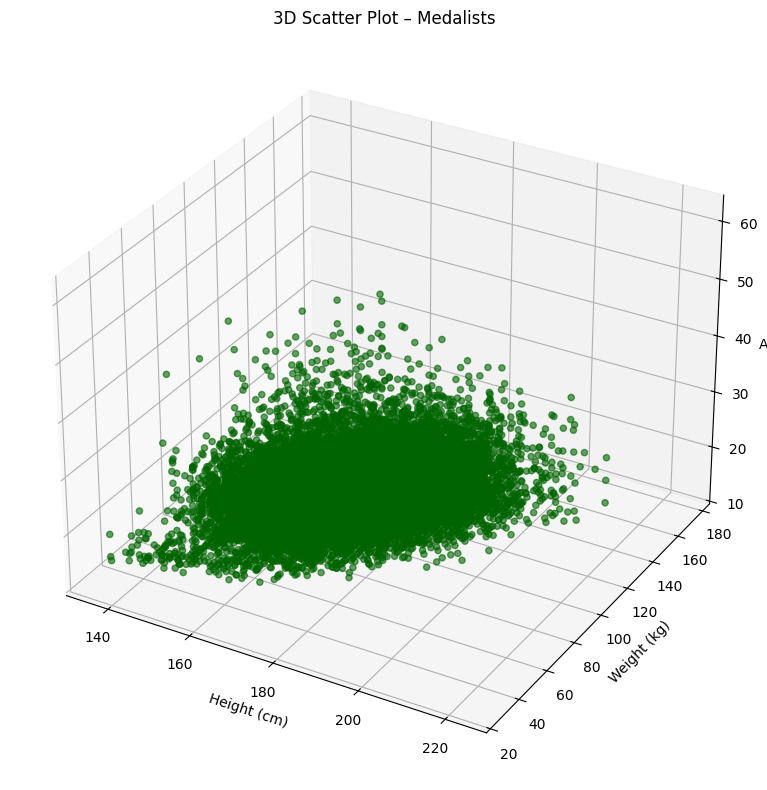

In [231]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(medalists_df['Height'], medalists_df['Weight'], medalists_df['Age'], c='darkgreen', alpha=0.6)
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Weight (kg)')
ax.set_zlabel('Age')
plt.title("3D Scatter Plot – Medalists")
plt.tight_layout()
plt.show()

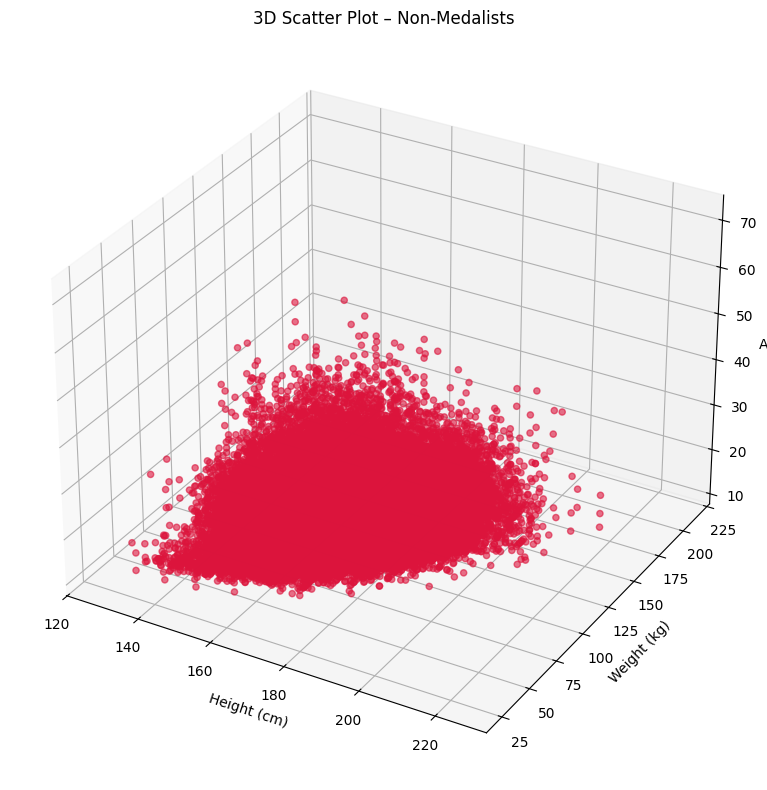

In [232]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(non_medalists_df['Height'], non_medalists_df['Weight'], non_medalists_df['Age'], c='crimson', alpha=0.6)
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Weight (kg)')
ax.set_zlabel('Age')
plt.title("3D Scatter Plot – Non-Medalists")
plt.tight_layout()
plt.show()

### **Encode & Feature Prep**

In [136]:
features = all_df[['Height', 'Age', 'Weight','Season_Encoded']]
label = all_df['Medalist']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state = 42)

In [138]:
#create a standardized version of the training and testing data
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [139]:
#create a normalized version of the training and testing data
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

In [140]:
#test on unscaled training data
model_unscaled = KNeighborsClassifier(n_neighbors=5)
model_unscaled.fit(X_train, y_train)
pred_unscaled = model_unscaled.predict(X_test)
print(accuracy_score(y_test, pred_unscaled))

0.7978289149060244


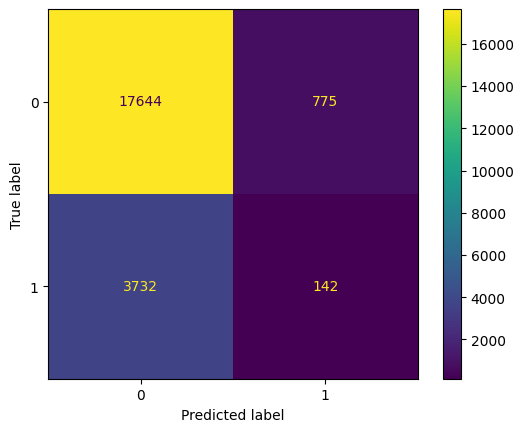

In [141]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_unscaled, display_labels = model_unscaled.classes_)
plt.show()

In [142]:
#Test on standardized training data
model_std = KNeighborsClassifier(n_neighbors=5)
model_std.fit(X_train_std, y_train)
pred_std =  model_std.predict(X_test_std)
print(accuracy_score(y_test, pred_std))

0.7994886287175347


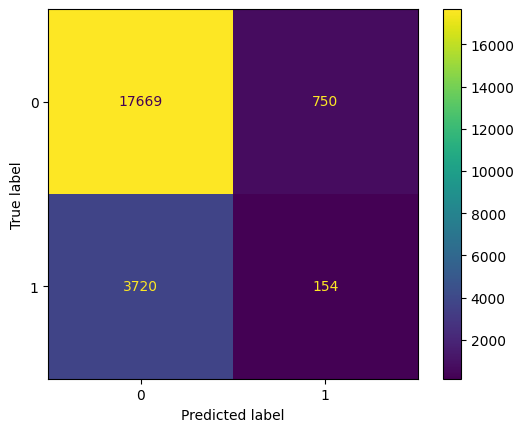

In [143]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_std, display_labels = model_std.classes_)
plt.show()

In [144]:
#Test on normalized data
model_norm = KNeighborsClassifier(n_neighbors=5)
model_norm.fit(X_train_norm, y_train)
pred_norm = model_norm.predict(X_test_norm)
print(accuracy_score(y_test, pred_norm))

0.7991746288072489


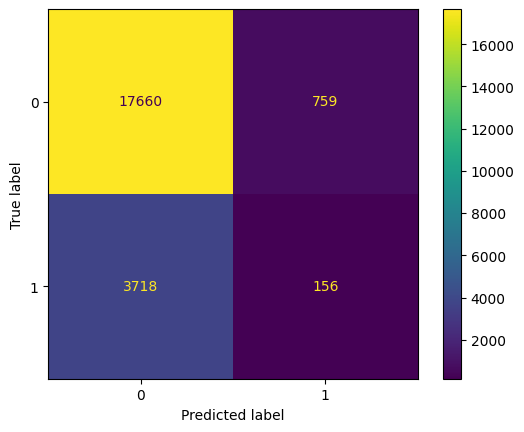

In [145]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_norm, display_labels = model_norm.classes_)
plt.show()

**Analysis**

# **Below: Visualization and Analysis of Recent Data For Males**

## Winter Season + Male Athletes

### Visualizations

In [153]:
male_winter_df = all_df[all_df['Season_Encoded'] == 0]
male_winter_df = male_winter_df[male_winter_df['Sex'] == 'M']
male_winter_df.reset_index(drop=True, inplace=True)
male_winter_df.head()

,ID,Sex,Age,Height,Weight,Year,Sport,Medalist,Season_Encoded
0,6,M,31.0,188.0,75.0,1992,Cross Country Skiing,0,0
1,6,M,33.0,188.0,75.0,1994,Cross Country Skiing,0,0
2,7,M,31.0,183.0,72.0,1992,Cross Country Skiing,0,0
3,7,M,33.0,183.0,72.0,1994,Cross Country Skiing,0,0
4,9,M,26.0,186.0,96.0,2002,Ice Hockey,0,0


In [163]:
mw_grouped_height = male_winter_df.groupby('Sport')[['Height']].describe()
mw_grouped_height

Height                                             \
                            count        mean       std    min    25%    50%   
Sport                                                                          
Alpine Skiing              1429.0  179.235129  5.567072  160.0  176.0  180.0   
Biathlon                   1041.0  179.244957  5.913034  160.0  175.0  180.0   
Bobsleigh                  1230.0  183.391870  5.674312  155.0  180.0  183.0   
Cross Country Skiing       1409.0  179.129170  6.048131  155.0  175.0  179.0   
Curling                     204.0  180.598039  4.890445  170.0  177.0  180.0   
Figure Skating              571.0  176.334501  6.460828  157.0  172.0  177.0   
Freestyle Skiing            483.0  176.403727  6.484625  149.0  172.0  176.0   
Ice Hockey                 2711.0  182.652527  5.693548  160.0  179.0  183.0   
Luge                        657.0  180.092846  6.269036  162.0  175.0  180.0   
Nordic Combined             534.0  177.114232  5.792217  162.0  173.0  177.0   
Short Track Speed Skating   419.0  175.470167  5.797701  162.0  172.0  175.0   
Skeleton                    108.0  181.018519  6.308252  157.0  177.0  180.0   
Ski Jumping                 728.0  177.662088  5.868208  162.0  173.0  178.0   
Snowboarding                475.0  178.389474  6.481546  157.0  175.0  179.0   
Speed Skating               948.0  180.494726  6.397182  162.0  177.0  181.0   

                                         
                             75%    max  
Sport                                    
Alpine Skiing              183.0  200.0  
Biathlon                   183.0  200.0  
Bobsleigh                  187.0  205.0  
Cross Country Skiing       183.0  200.0  
Curling                    184.0  193.0  
Figure Skating             180.0  193.0  
Freestyle Skiing           180.0  197.0  
Ice Hockey                 186.0  206.0  
Luge                       185.0  199.0  
Nordic Combined            181.0  193.0  
Short Track Speed Skating  180.0  191.0  
Skeleton                   185.0  197.0  
Ski Jumping                182.0  193.0  
Snowboarding               184.0  191.0  
Speed Skating              185.0  203.0

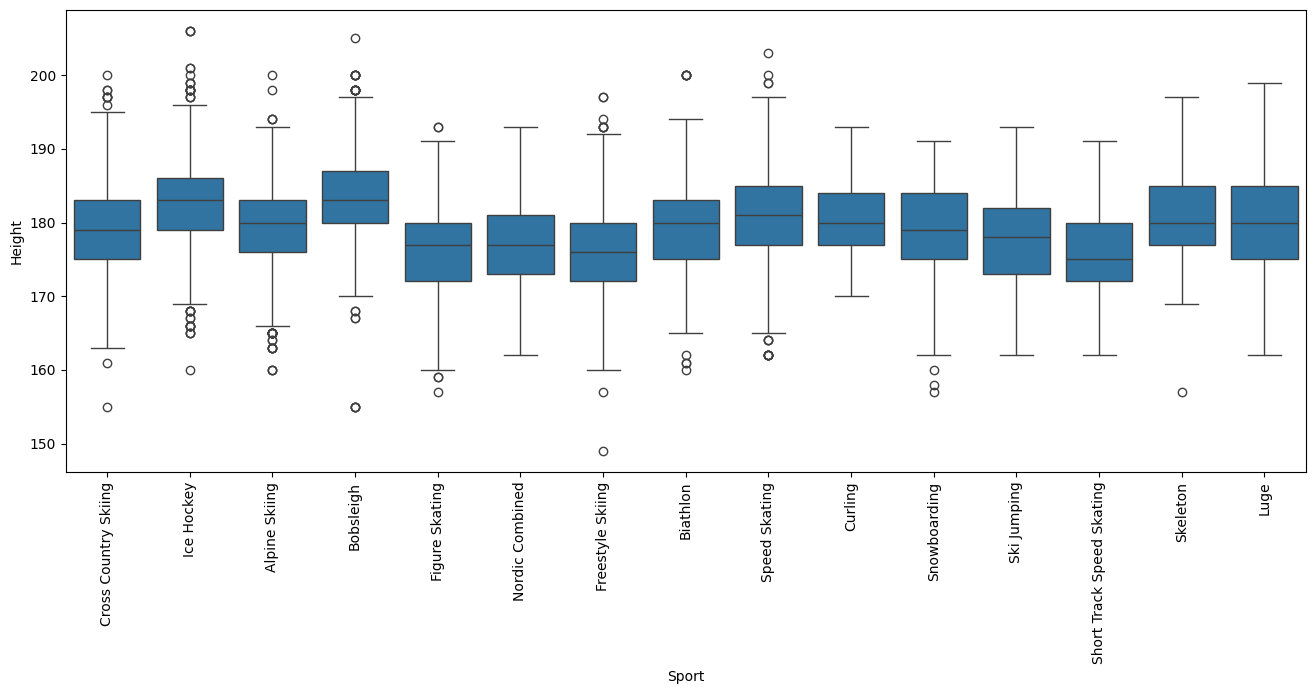

In [166]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Sport', y='Height', data=male_winter_df)
plt.xticks(rotation=90)
plt.show()

In [167]:
mw_grouped_weight = male_winter_df.groupby('Sport')[['Weight']].describe()
mw_grouped_weight

Weight                                         \
                            count       mean       std   min   25%   50%   
Sport                                                                      
Alpine Skiing              1429.0  81.100770  8.483094  53.0  75.0  82.0   
Biathlon                   1041.0  72.832853  6.345684  51.0  69.0  73.0   
Bobsleigh                  1230.0  92.700407  8.598960  70.0  86.0  93.0   
Cross Country Skiing       1409.0  72.702271  6.265342  53.0  69.0  72.0   
Curling                     204.0  81.465686  8.221910  61.0  76.0  82.0   
Figure Skating              571.0  69.912434  7.570907  50.0  65.0  70.0   
Freestyle Skiing            483.0  74.716356  8.619930  47.0  69.0  74.0   
Ice Hockey                 2711.0  86.458318  7.603342  62.0  82.0  86.0   
Luge                        657.0  82.054795  8.596478  60.0  76.0  82.0   
Nordic Combined             534.0  66.708801  5.683320  53.0  63.0  67.0   
Short Track Speed Skating   419.0  71.322196  6.359167  51.0  67.0  72.0   
Skeleton                    108.0  81.962963  7.763954  65.0  78.0  80.5   
Ski Jumping                 728.0  63.996566  5.899694  50.0  60.0  64.0   
Snowboarding                475.0  76.671579  9.109133  50.0  70.0  78.0   
Speed Skating               948.0  77.946203  7.093750  52.0  73.0  78.0   

                                        
                            75%    max  
Sport                                   
Alpine Skiing              87.0  107.0  
Biathlon                   77.0   95.0  
Bobsleigh                  98.0  123.0  
Cross Country Skiing       77.0  100.0  
Curling                    86.0  105.0  
Figure Skating             75.0   90.0  
Freestyle Skiing           80.0  108.0  
Ice Hockey                 91.0  116.0  
Luge                       89.0  112.0  
Nordic Combined            70.0   85.0  
Short Track Speed Skating  75.0   86.0  
Skeleton                   85.0  127.0  
Ski Jumping                68.0   82.0  
Snowboarding               83.0  102.0  
Speed Skating              82.0  100.0

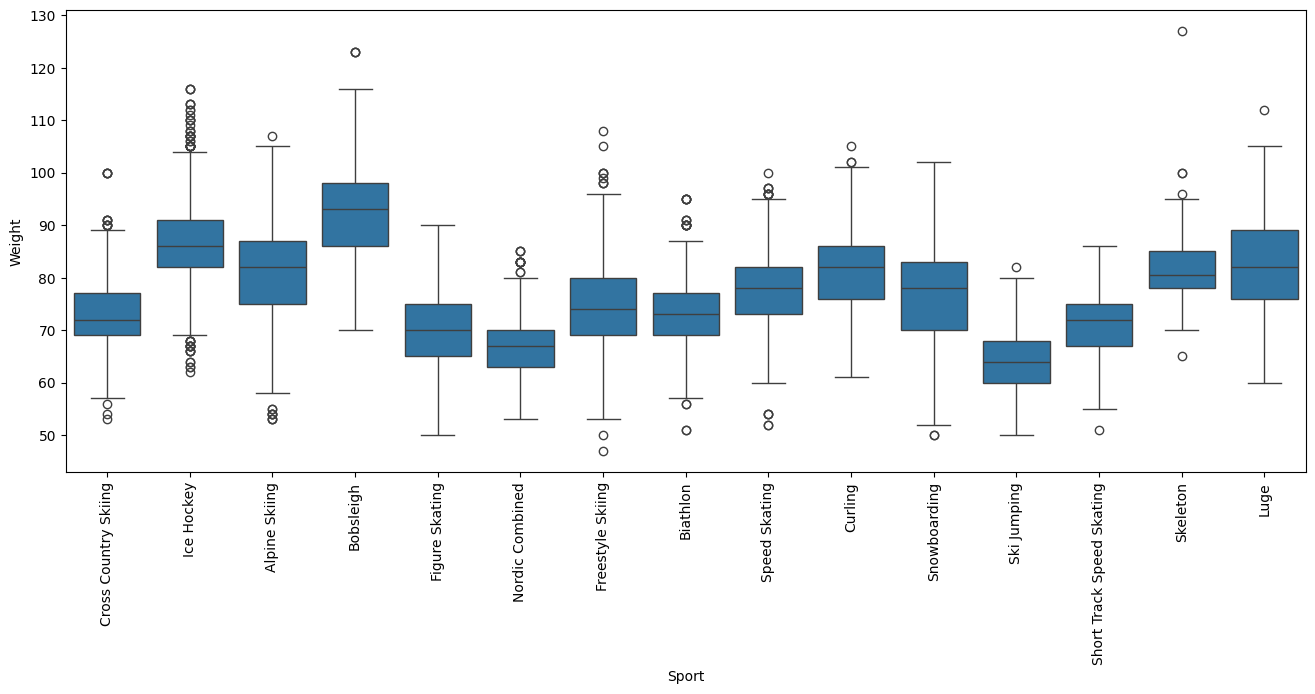

In [170]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Sport', y='Weight', data=male_winter_df)
plt.xticks(rotation=90)
plt.show()

In [171]:
mw_grouped_age = male_winter_df.groupby('Sport')[['Age']].describe()
mw_grouped_age

Age                                         \
                            count       mean       std   min   25%   50%   
Sport                                                                      
Alpine Skiing              1429.0  24.729181  4.261432  15.0  22.0  24.0   
Biathlon                   1041.0  26.853026  4.393233  17.0  24.0  26.0   
Bobsleigh                  1230.0  28.526829  4.636732  18.0  25.0  28.0   
Cross Country Skiing       1409.0  26.488290  4.530990  16.0  23.0  26.0   
Curling                     204.0  32.137255  6.494468  20.0  27.0  31.0   
Figure Skating              571.0  24.124343  3.737945  14.0  21.0  24.0   
Freestyle Skiing            483.0  24.465839  4.440521  15.0  21.0  24.0   
Ice Hockey                 2711.0  26.829214  4.384219  17.0  23.5  26.0   
Luge                        657.0  25.112633  4.944149  16.0  22.0  24.0   
Nordic Combined             534.0  23.998127  3.916818  15.0  21.0  24.0   
Short Track Speed Skating   419.0  23.100239  3.561419  15.0  20.0  23.0   
Skeleton                    108.0  29.824074  5.536335  18.0  26.0  30.0   
Ski Jumping                 728.0  23.178571  4.036420  14.0  20.0  23.0   
Snowboarding                475.0  24.791579  4.462778  15.0  22.0  24.0   
Speed Skating               948.0  24.518987  3.865568  15.0  22.0  24.0   

                                       
                            75%   max  
Sport                                  
Alpine Skiing              27.0  55.0  
Biathlon                   30.0  45.0  
Bobsleigh                  31.0  53.0  
Cross Country Skiing       29.0  47.0  
Curling                    37.0  50.0  
Figure Skating             27.0  36.0  
Freestyle Skiing           27.0  44.0  
Ice Hockey                 30.0  44.0  
Luge                       28.0  52.0  
Nordic Combined            27.0  37.0  
Short Track Speed Skating  26.0  34.0  
Skeleton                   33.0  45.0  
Ski Jumping                26.0  41.0  
Snowboarding               27.5  38.0  
Speed Skating              27.0  41.0

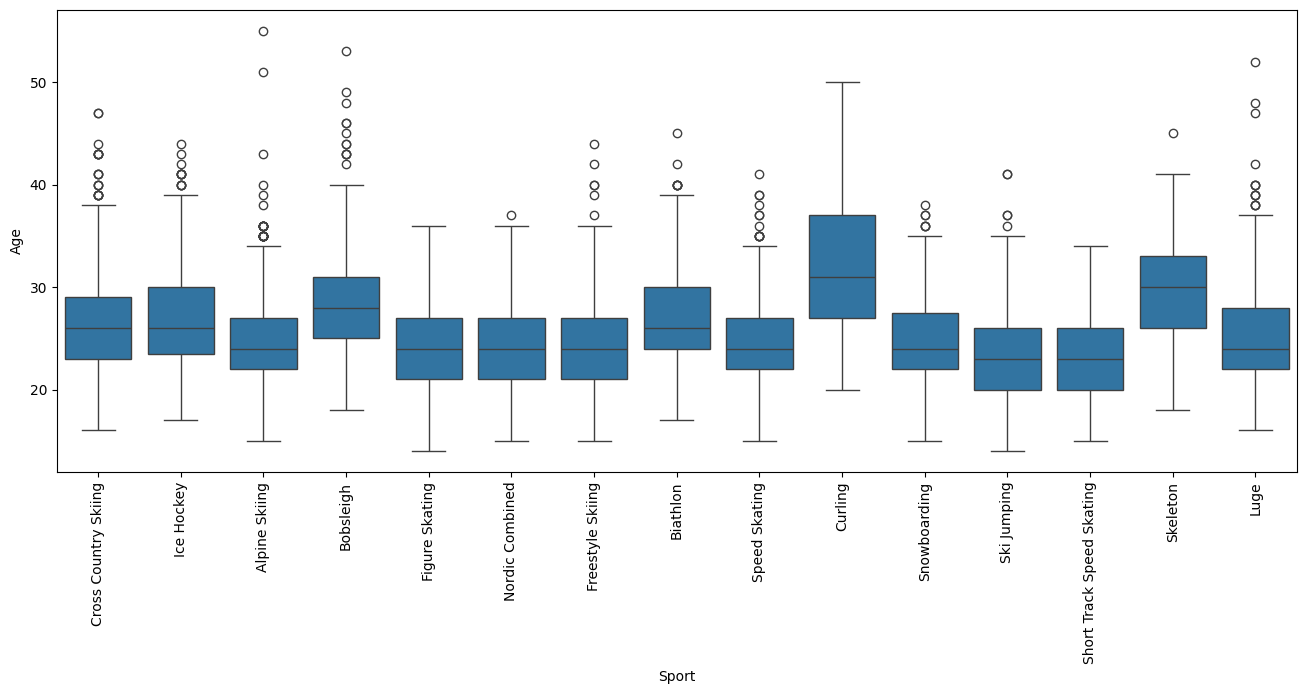

In [172]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Sport', y='Age', data=male_winter_df)
plt.xticks(rotation = 90)
plt.show()

### Feature Prep & Predictions

In [173]:
mw_features = male_winter_df[['Height', 'Age', 'Weight']]
mw_label = male_winter_df['Medalist']

In [181]:
X_train_mw, X_test_mw, y_train_mw, y_test_mw = train_test_split(mw_features, mw_label, test_size=0.2, random_state=42)

In [182]:
#create a standardized version of the training and testing data
std_scaler = StandardScaler()
X_train_mw_std = std_scaler.fit_transform(X_train_mw)
X_test__mw_std = std_scaler.transform(X_test_mw)

In [183]:
#create a normalized version of the training and testing data
norm_scaler = MinMaxScaler()
X_train_mw_norm = norm_scaler.fit_transform(X_train_mw)
X_test_mw_norm = norm_scaler.transform(X_test_mw)

### Unscaled Training Data Test

In [184]:
#test on unscaled training data
model_unscaled_mw = KNeighborsClassifier(n_neighbors=5)
model_unscaled_mw.fit(X_train_mw, y_train_mw)
pred_unscaled_mw = model_unscaled_mw.predict(X_test_mw)
print(accuracy_score(y_test_mw, pred_unscaled_mw))

0.816988416988417


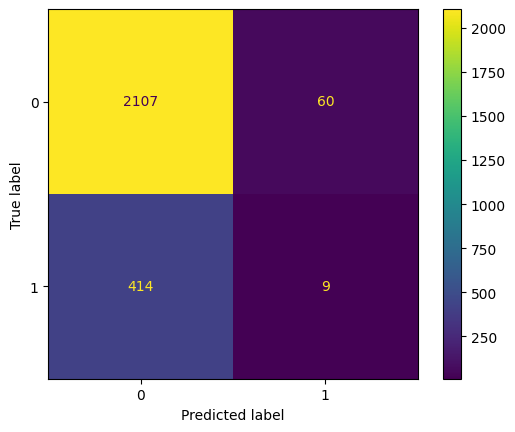

In [185]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mw, pred_unscaled_mw, display_labels = model_unscaled_mw.classes_)
plt.show()

### Standardized Data Training Test

In [186]:
model_std_mw = KNeighborsClassifier(n_neighbors=5)
model_std_mw.fit(X_train_mw_std, y_train_mw)
pred_std_mw = model_std_mw.predict(X_test__mw_std)
print(accuracy_score(y_test_mw, pred_std_mw))

0.8216216216216217


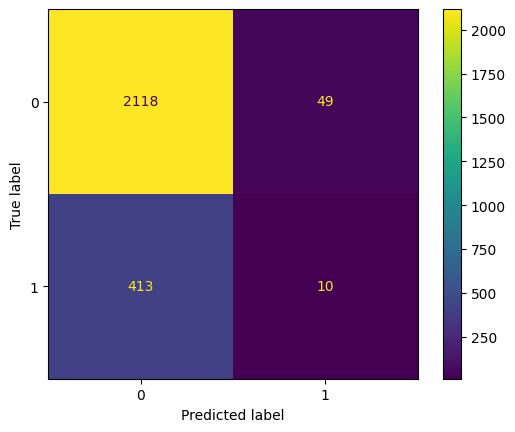

In [187]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mw, pred_std_mw, display_labels=model_std_mw.classes_)
plt.show()

### Normalized Data Training Test

In [188]:
model_norm_mw = KNeighborsClassifier(n_neighbors = 5)
model_norm_mw.fit(X_train_mw_norm, y_train_mw)
pred_norm_mw = model_norm_mw.predict(X_test_mw_norm)
print(accuracy_score(y_test_mw, pred_norm_mw))

0.815057915057915


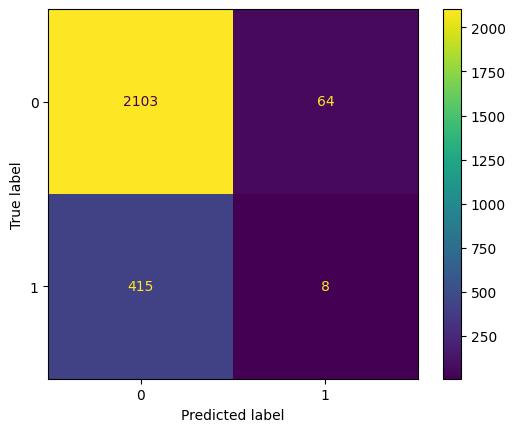

In [189]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_mw, pred_norm_mw, display_labels=model_norm_mw.classes_)
plt.show()

### Analysis

## Summer Season + Male Athlete

### Visualizations

In [190]:
male_summer_df = all_df[all_df['Season_Encoded'] == 1]
male_summer_df = male_summer_df[male_summer_df['Sex'] == 'M']
male_summer_df.reset_index(drop=True, inplace=True)
male_summer_df.head()

,ID,Sex,Age,Height,Weight,Year,Sport,Medalist,Season_Encoded
0,1,M,24.0,180.0,80.0,1992,Basketball,0,1
1,2,M,23.0,170.0,60.0,2012,Judo,0,1
2,12,M,31.0,172.0,70.0,2000,Badminton,0,1
3,18,M,31.0,189.0,130.0,2000,Athletics,0,1
4,23,M,22.0,187.0,89.0,2000,Wrestling,0,1


In [195]:
ms_grouped_height = male_summer_df.groupby('Sport')[['Height']].describe()
ms_grouped_height

Height                                              \
                     count        mean        std    min    25%    50%   
Sport                                                                    
Archery              673.0  178.683507   6.562156  157.0  175.0  178.0   
Athletics          10580.0  180.986862   8.632037  150.0  175.0  181.0   
Badminton            619.0  179.510501   6.623079  160.0  175.0  180.0   
Baseball             846.0  182.599291   6.785222  147.0  178.0  183.0   
Basketball          1400.0  199.135000   9.204588  174.0  193.0  200.0   
Beach Volleyball     273.0  193.289377   6.036695  179.0  190.0  193.0   
Boxing              2780.0  173.794604   9.678118  127.0  167.0  173.0   
Canoeing            2415.0  182.091097   6.888446  159.0  178.0  182.0   
Cycling             3313.0  179.105041   6.582197  138.0  175.0  180.0   
Diving               589.0  171.426146   5.956195  148.0  168.0  172.0   
Equestrianism       1394.0  177.842898   6.923673  154.0  173.0  178.0   
Fencing             1709.0  182.321240   6.640600  164.0  178.0  182.0   
Football            2213.0  179.301401   6.565843  140.0  175.0  179.0   
Golf                  53.0  179.320755   7.812154  165.0  173.0  180.0   
Gymnastics          1123.0  166.637578   5.306597  153.0  163.0  166.0   
Handball            1637.0  189.841784   7.029019  164.0  185.0  190.0   
Hockey              1657.0  178.166566   6.863139  150.0  174.0  178.0   
Judo                1988.0  177.548290   9.542646  145.0  170.0  178.0   
Modern Pentathlon    422.0  180.772512   5.714124  165.0  177.0  180.0   
Rowing              3441.0  189.095321   8.527840  142.0  185.0  190.0   
Rugby Sevens         151.0  182.834437   7.326145  169.0  177.0  184.0   
Sailing             2542.0  181.158930   7.077682  156.0  176.0  181.0   
Shooting            2652.0  177.055430   6.553521  147.0  173.0  177.0   
Swimming            4368.0  185.693681   7.511477  153.0  181.0  186.0   
Table Tennis         662.0  177.105740   7.360873  150.0  172.0  178.0   
Taekwondo            306.0  182.418301   9.011915  160.0  176.0  183.0   
Tennis               773.0  184.993532   6.623964  166.0  180.0  185.0   
Trampolining          74.0  171.459459   5.379283  162.0  168.0  170.0   
Triathlon            265.0  180.207547   6.054545  164.0  176.0  180.0   
Volleyball          1295.0  195.586100   7.219893  171.0  191.0  196.0   
Water Polo          1436.0  189.395543   6.805579  169.0  185.0  190.0   
Weightlifting       1591.0  169.815839   9.905625  140.0  162.0  170.0   
Wrestling           2966.0  173.719150  10.105699  140.0  166.0  173.0   

                                  
                      75%    max  
Sport                             
Archery            183.00  197.0  
Athletics          187.00  208.0  
Badminton          183.00  201.0  
Baseball           187.00  206.0  
Basketball         206.00  226.0  
Beach Volleyball   198.00  212.0  
Boxing             180.00  205.0  
Canoeing           187.00  205.0  
Cycling            183.00  200.0  
Diving             175.00  188.0  
Equestrianism      182.75  197.0  
Fencing            187.00  208.0  
Football           184.00  200.0  
Golf               185.00  196.0  
Gymnastics         170.00  184.0  
Handball           195.00  214.0  
Hockey             183.00  200.0  
Judo               184.00  213.0  
Modern Pentathlon  185.00  198.0  
Rowing             195.00  209.0  
Rugby Sevens       188.00  198.0  
Sailing            186.00  213.0  
Shooting           182.00  213.0  
Swimming           190.00  209.0  
Table Tennis       182.00  198.0  
Taekwondo          189.00  207.0  
Tennis             190.00  208.0  
Trampolining       175.00  185.0  
Triathlon          185.00  196.0  
Volleyball         200.00  219.0  
Water Polo         194.00  206.0  
Weightlifting      177.00  205.0  
Wrestling          180.00  214.0

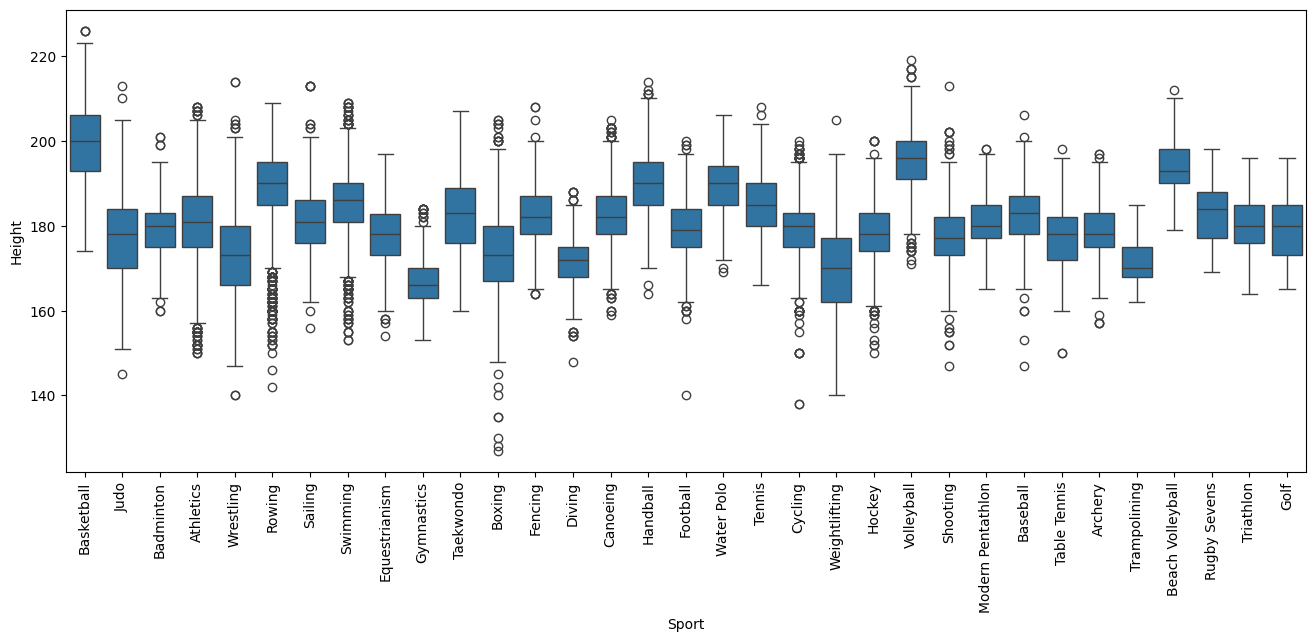

In [196]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Sport', y='Height', data=male_summer_df)
plt.xticks(rotation=90)
plt.show()

In [197]:
ms_grouped_weight = male_summer_df.groupby('Sport')[['Weight']].describe()
ms_grouped_weight

Weight                                                   \
                     count       mean        std   min    25%   50%     75%   
Sport                                                                         
Archery              673.0  77.341010  12.470530  46.0  70.00  76.0   84.00   
Athletics          10580.0  75.325567  17.061956  42.0  64.00  72.0   80.00   
Badminton            619.0  74.134087   7.339366  55.0  69.00  74.0   79.00   
Baseball             846.0  85.718085   9.670122  38.0  79.00  85.0   92.00   
Basketball          1400.0  96.697143  12.855095  59.0  88.00  95.0  105.00   
Beach Volleyball     273.0  89.512821   6.815911  62.0  85.00  89.0   93.00   
Boxing              2780.0  65.996403  13.908157  47.0  54.00  64.0   75.00   
Canoeing            2415.0  81.058385   8.066900  57.0  75.00  81.0   86.00   
Cycling             3313.0  72.729852   8.284171  49.0  67.00  72.0   78.00   
Diving               589.0  66.777589   7.614139  37.0  62.00  67.0   72.00   
Equestrianism       1394.0  72.048780   7.068412  50.0  68.00  71.0   77.00   
Fencing             1709.0  77.037449   7.886624  48.0  72.00  77.0   82.00   
Football            2213.0  74.464076   6.688459  49.0  70.00  74.0   78.00   
Golf                  53.0  79.245283   9.510936  63.0  72.00  78.0   86.00   
Gymnastics          1123.0  62.326803   5.551498  46.0  58.00  62.0   65.00   
Handball            1637.0  90.893097   9.495537  62.0  84.00  90.0   97.00   
Hockey              1657.0  75.285456   7.838188  48.0  70.00  75.0   80.00   
Judo                1988.0  83.774648  20.950574  57.0  66.00  80.0   95.00   
Modern Pentathlon    422.0  73.045024   5.614632  57.0  70.00  73.0   77.00   
Rowing              3441.0  85.999564  12.013628  45.0  80.00  89.0   94.00   
Rugby Sevens         151.0  91.006623   9.237241  65.0  85.00  90.0   98.00   
Sailing             2542.0  79.408537  12.699320  50.0  70.00  77.0   86.00   
Shooting            2652.0  79.574095  12.224477  41.0  71.00  79.0   86.00   
Swimming            4368.0  79.190934   8.406523  45.0  74.00  79.0   85.00   
Table Tennis         662.0  71.549849   8.272391  50.0  65.00  72.0   77.00   
Taekwondo            306.0  74.653595  13.433050  54.0  63.25  75.0   83.00   
Tennis               773.0  79.027167   6.980397  59.0  75.00  79.0   83.00   
Trampolining          74.0  65.837838   6.283327  57.0  62.00  64.0   69.00   
Triathlon            265.0  68.803774   5.333498  54.0  65.00  69.0   72.00   
Volleyball          1295.0  88.722780   7.953860  56.0  84.00  89.0   94.00   
Water Polo          1436.0  90.559889  10.183469  61.0  83.00  90.0   97.00   
Weightlifting       1591.0  83.727216  24.704723  50.0  63.50  78.0   98.75   
Wrestling           2966.0  78.082097  20.998392  47.0  61.00  74.0   90.00   

                          
                     max  
Sport                     
Archery            130.0  
Athletics          165.0  
Badminton           97.0  
Baseball           120.0  
Basketball         156.0  
Beach Volleyball   110.0  
Boxing             140.0  
Canoeing           115.0  
Cycling            104.0  
Diving              91.0  
Equestrianism      100.0  
Fencing            108.0  
Football           100.0  
Golf               104.0  
Gymnastics          87.0  
Handball           132.0  
Hockey             105.0  
Judo               214.0  
Modern Pentathlon   91.0  
Rowing             114.0  
Rugby Sevens       113.0  
Sailing            130.0  
Shooting           140.0  
Swimming           112.0  
Table Tennis        99.0  
Taekwondo          110.0  
Tennis             111.0  
Trampolining        84.0  
Triathlon           82.0  
Volleyball         120.0  
Water Polo         125.0  
Weightlifting      176.5  
Wrestling          190.0

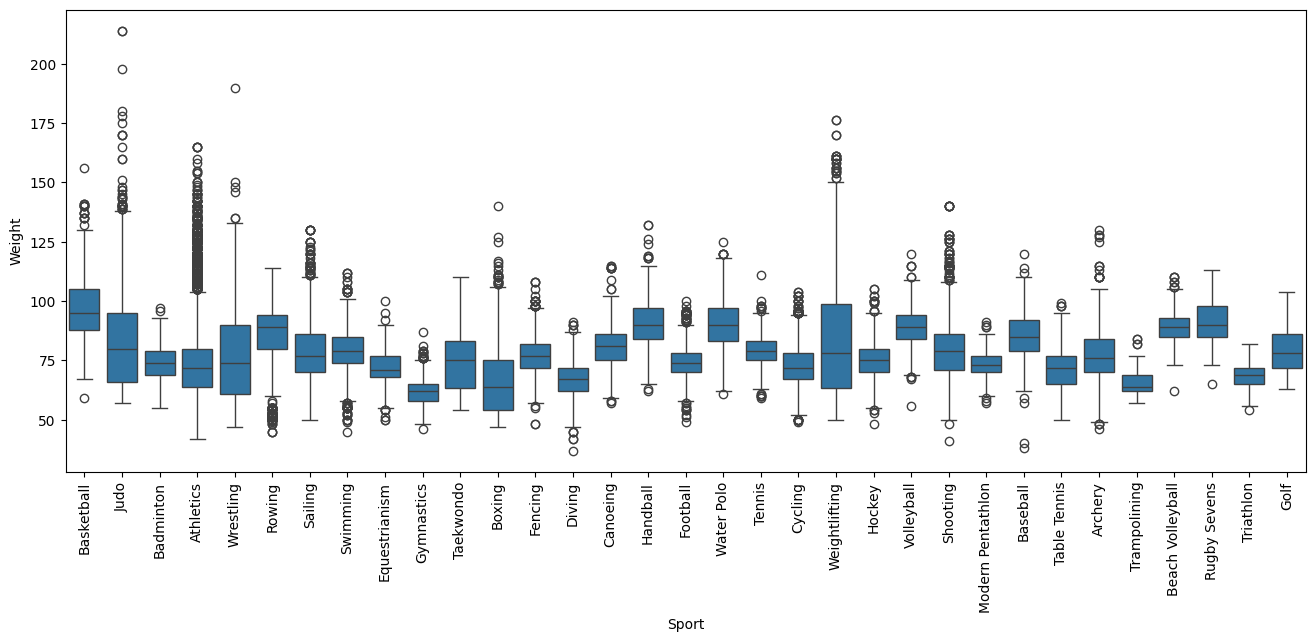

In [198]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Sport',y='Weight', data=male_summer_df)
plt.xticks(rotation=90)
plt.show()

In [199]:
ms_grouped_age = male_summer_df.groupby('Sport')[['Weight']].describe()
ms_grouped_age

Weight                                                   \
                     count       mean        std   min    25%   50%     75%   
Sport                                                                         
Archery              673.0  77.341010  12.470530  46.0  70.00  76.0   84.00   
Athletics          10580.0  75.325567  17.061956  42.0  64.00  72.0   80.00   
Badminton            619.0  74.134087   7.339366  55.0  69.00  74.0   79.00   
Baseball             846.0  85.718085   9.670122  38.0  79.00  85.0   92.00   
Basketball          1400.0  96.697143  12.855095  59.0  88.00  95.0  105.00   
Beach Volleyball     273.0  89.512821   6.815911  62.0  85.00  89.0   93.00   
Boxing              2780.0  65.996403  13.908157  47.0  54.00  64.0   75.00   
Canoeing            2415.0  81.058385   8.066900  57.0  75.00  81.0   86.00   
Cycling             3313.0  72.729852   8.284171  49.0  67.00  72.0   78.00   
Diving               589.0  66.777589   7.614139  37.0  62.00  67.0   72.00   
Equestrianism       1394.0  72.048780   7.068412  50.0  68.00  71.0   77.00   
Fencing             1709.0  77.037449   7.886624  48.0  72.00  77.0   82.00   
Football            2213.0  74.464076   6.688459  49.0  70.00  74.0   78.00   
Golf                  53.0  79.245283   9.510936  63.0  72.00  78.0   86.00   
Gymnastics          1123.0  62.326803   5.551498  46.0  58.00  62.0   65.00   
Handball            1637.0  90.893097   9.495537  62.0  84.00  90.0   97.00   
Hockey              1657.0  75.285456   7.838188  48.0  70.00  75.0   80.00   
Judo                1988.0  83.774648  20.950574  57.0  66.00  80.0   95.00   
Modern Pentathlon    422.0  73.045024   5.614632  57.0  70.00  73.0   77.00   
Rowing              3441.0  85.999564  12.013628  45.0  80.00  89.0   94.00   
Rugby Sevens         151.0  91.006623   9.237241  65.0  85.00  90.0   98.00   
Sailing             2542.0  79.408537  12.699320  50.0  70.00  77.0   86.00   
Shooting            2652.0  79.574095  12.224477  41.0  71.00  79.0   86.00   
Swimming            4368.0  79.190934   8.406523  45.0  74.00  79.0   85.00   
Table Tennis         662.0  71.549849   8.272391  50.0  65.00  72.0   77.00   
Taekwondo            306.0  74.653595  13.433050  54.0  63.25  75.0   83.00   
Tennis               773.0  79.027167   6.980397  59.0  75.00  79.0   83.00   
Trampolining          74.0  65.837838   6.283327  57.0  62.00  64.0   69.00   
Triathlon            265.0  68.803774   5.333498  54.0  65.00  69.0   72.00   
Volleyball          1295.0  88.722780   7.953860  56.0  84.00  89.0   94.00   
Water Polo          1436.0  90.559889  10.183469  61.0  83.00  90.0   97.00   
Weightlifting       1591.0  83.727216  24.704723  50.0  63.50  78.0   98.75   
Wrestling           2966.0  78.082097  20.998392  47.0  61.00  74.0   90.00   

                          
                     max  
Sport                     
Archery            130.0  
Athletics          165.0  
Badminton           97.0  
Baseball           120.0  
Basketball         156.0  
Beach Volleyball   110.0  
Boxing             140.0  
Canoeing           115.0  
Cycling            104.0  
Diving              91.0  
Equestrianism      100.0  
Fencing            108.0  
Football           100.0  
Golf               104.0  
Gymnastics          87.0  
Handball           132.0  
Hockey             105.0  
Judo               214.0  
Modern Pentathlon   91.0  
Rowing             114.0  
Rugby Sevens       113.0  
Sailing            130.0  
Shooting           140.0  
Swimming           112.0  
Table Tennis        99.0  
Taekwondo          110.0  
Tennis             111.0  
Trampolining        84.0  
Triathlon           82.0  
Volleyball         120.0  
Water Polo         125.0  
Weightlifting      176.5  
Wrestling          190.0

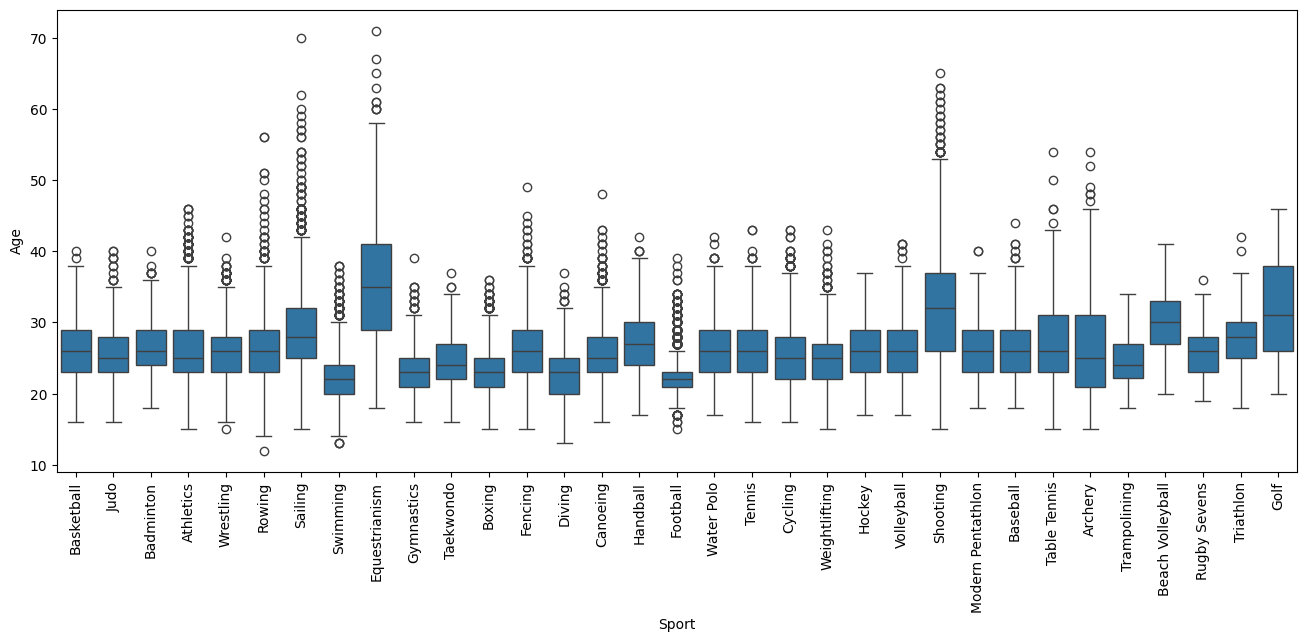

In [200]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Sport',y='Age', data=male_summer_df)
plt.xticks(rotation=90)
plt.show()

### Feature Prep + Predictions

In [203]:
ms_features = male_summer_df[['Height', 'Age', 'Weight']]
ms_label = male_summer_df['Medalist']

In [204]:
X_test_ms, X_train_ms, y_test_ms, y_train_ms = train_test_split(ms_features, ms_label, test_size=0.2, random_state=42)

In [205]:
#Create standardized version of training and testing data
std_scaler = StandardScaler()
X_train_ms_std = std_scaler.fit_transform(X_train_ms)
X_test_ms_std = std_scaler.transform(X_test_ms)

In [206]:
# Create a normalized version of training and testing data
norm_scaler = MinMaxScaler()
X_train_ms_norm = norm_scaler.fit_transform(X_train_ms)
X_test_ms_norm = norm_scaler.transform(X_test_ms)

### Unscaled Data Training Test

In [209]:
model_unscaled_ms = KNeighborsClassifier(n_neighbors=5)
model_unscaled_ms.fit(X_train_ms, y_train_ms)
pred_unscaled_ms = model_unscaled_ms.predict(X_test_ms)
print(accuracy_score(y_test_ms, pred_unscaled_ms))

0.8078558543080492


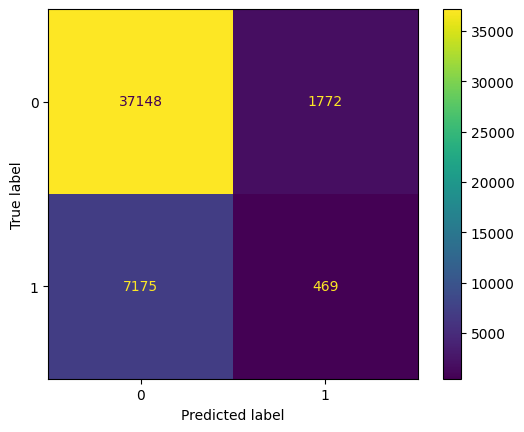

In [211]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_ms, pred_unscaled_ms, display_labels = model_unscaled_ms.classes_)
plt.show()

### Standardized Data Training Test

In [213]:
model_std_ms = KNeighborsClassifier(n_neighbors=5)
model_std_ms.fit(X_train_ms_std, y_train_ms)
pred_std_ms = model_std_ms.predict(X_test_ms_std)
print(accuracy_score(y_test_ms, pred_std_ms))

0.8122798728631561


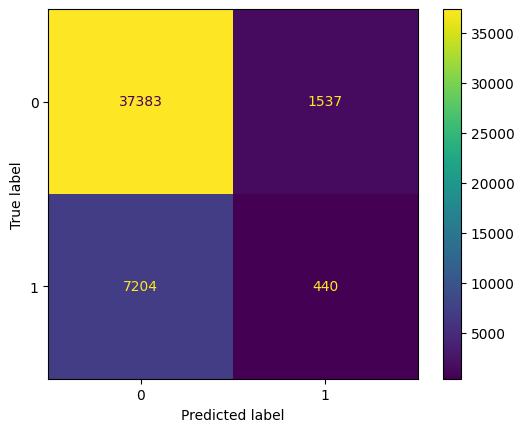

In [214]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_ms, pred_std_ms, display_labels=model_std_ms.classes_)
plt.show()

### Normalized Data Training Test

In [215]:
model_norm_ms = KNeighborsClassifier(n_neighbors=5)
model_norm_ms.fit(X_train_ms_norm, y_train_ms)
pred_norm_ms = model_norm_ms.predict(X_test_ms_norm)
print(accuracy_score(y_test_ms, pred_norm_ms))

0.8118503564985826


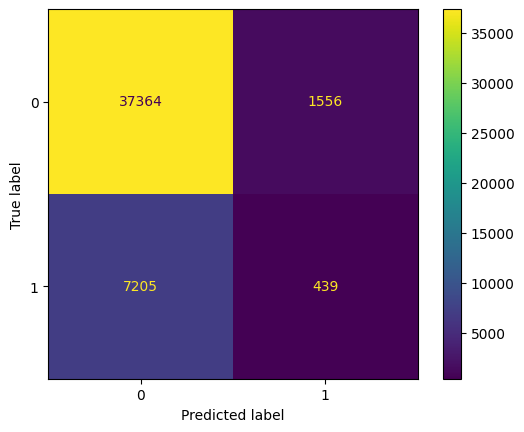

In [216]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test_ms, pred_norm_ms, display_labels=model_norm_ms.classes_)
plt.show()

# **Below: Visualization and Analysis of Recent Data for Females**

## Winter Season + Female Athlete

In [158]:
female_winter_df = all_df[all_df['Season_Encoded'] == 0]
female_winter_df = female_winter_df[female_winter_df['Sex'] == 'F']
female_winter_df.reset_index(drop=True, inplace=True)
female_winter_df.head()

,ID,Sex,Age,Height,Weight,Year,Sport,Medalist,Season_Encoded
0,5,F,21.0,185.0,82.0,1988,Speed Skating,0,0
1,5,F,25.0,185.0,82.0,1992,Speed Skating,0,0
2,5,F,27.0,185.0,82.0,1994,Speed Skating,0,0
3,14,F,32.0,171.0,65.0,1994,Biathlon,0,0
4,26,F,17.0,169.0,65.0,1984,Luge,0,0


## Summer Season + Female Athlete

In [161]:
female_summer_df = all_df[all_df['Season_Encoded'] == 1]
female_summer_df = female_summer_df[female_summer_df['Sex'] == 'F']
female_summer_df.reset_index(drop=True, inplace=True)
female_summer_df.head()

,ID,Sex,Age,Height,Weight,Year,Sport,Medalist,Season_Encoded
0,13,F,30.0,159.0,55.5,1996,Sailing,0,1
1,13,F,34.0,159.0,55.5,2000,Sailing,0,1
2,22,F,22.0,170.0,125.0,2016,Weightlifting,0,1
3,37,F,23.0,182.0,64.0,1996,Football,1,1
4,49,F,24.0,168.0,65.0,2004,Athletics,0,1
